# Libraries

In [31]:
# !pip install yellowbrick
# !pip uninstall scikit-learn -y
# !pip3 install scikit-learn 
# !pip install pycaret[Full]
# !pip install pyyaml==5.4.1
# !pip install pycaret
# !pip install optuna
# !pip install Jinja2

In [42]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.model_selection import GridSearchCV

from yellowbrick.regressor import AlphaSelection

from sklearn.utils.metaestimators import available_if
from sklearn.metrics import DistanceMetric
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor




AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

In [8]:
#Loading Dataframe

df=pd.read_csv("data/vehicles_gold.csv")
df=df.drop('id',axis=1)

df2=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,prescott,2007.350000,infiniti,g series,fair,5 cylinders,gas,65379.097203,clean,automatic,4wd,full-size,offroad,grey,6000.0
1,fayetteville,2009.166667,infiniti,g series,fair,5 cylinders,gas,77263.450000,clean,automatic,4wd,full-size,offroad,grey,11900.0
2,florida keys,2015.800000,infiniti,g series,fair,5 cylinders,gas,35143.808000,clean,automatic,4wd,full-size,offroad,grey,21000.0
3,worcester / central MA,1995.700000,infiniti,g series,fair,5 cylinders,gas,169798.398913,clean,automatic,4wd,full-size,offroad,grey,1500.0
4,greensboro,2007.142857,infiniti,g series,fair,5 cylinders,gas,161153.544737,clean,automatic,4wd,full-size,offroad,grey,4900.0


In [9]:
#defining numerical and categorical values

num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

# 1) Transforming categorical columns values into integer values

In [10]:
le=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [11]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,277,2007.350000,17,12935,1,4,2,65379.097203,0,0,0,1,6,5,6000.0
1,105,2009.166667,17,12935,1,4,2,77263.450000,0,0,0,1,6,5,11900.0


# 2) Scaling Dataset

In [13]:
#scaling numerical data

norm = StandardScaler()
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))

In [9]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,0.702924,0.271095,17,-0.024774,1,4,2,0.081454,0,0,0,1,6,5,8.699515
1,-0.751876,0.271095,17,-0.024774,1,4,2,0.081454,0,0,0,1,6,5,9.384294


In [14]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [15]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

# 3) Model Implementation


####       1) Linear Regressor
####       2) Ridge Regressor
####       3) Lasso Regressor
####       4) K-Neighbors Regressor
####       5) Random Forest Regressor
####       6) Bagging Regressor
####       7) Adaboost Regressor
####       8) XGBoost Regressor

## 3.1) Linear Regression

In [16]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [17]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-1.51555717e-04  4.49537235e-02 -4.85399987e-05 -2.35101153e-04
 -3.26191724e-03  2.10386989e-02 -1.60017021e-02 -2.63149826e-02
 -9.62676218e-03  5.79125835e-03 -8.69546612e-03 -3.88713240e-03
  2.05343189e-04  5.61866272e-04]
MSLE : 0.0002652897154535384
Root MSLE : 0.01628771670472993
R2 Score : 0.6250943672038445 or 62.5094%


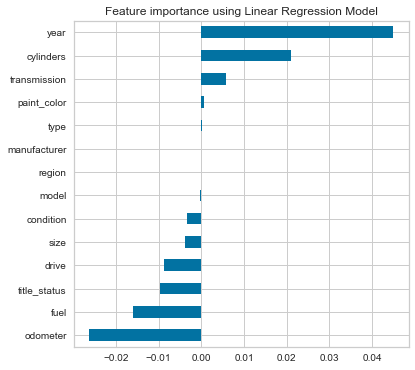

In [19]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('images/Linear-Regression-Feature-Importance.jpg')
plt.show()

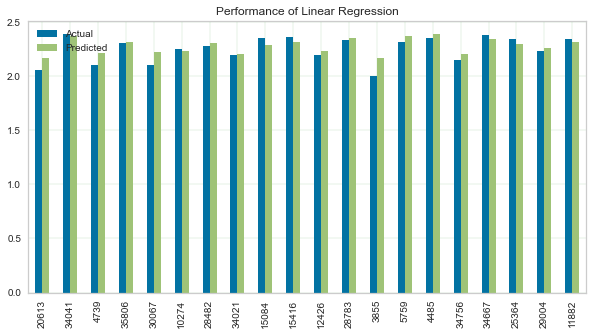

In [20]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('images/Linear-Regression-Performance')
plt.show()

## 3.2) Ridge regression

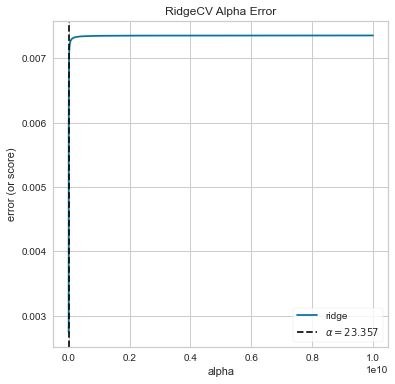

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [21]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [25]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [24]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0002652897154535384
Root MSLE : 0.01628771670472993
R2 Score : 0.6250943672038445 or 62.5094%


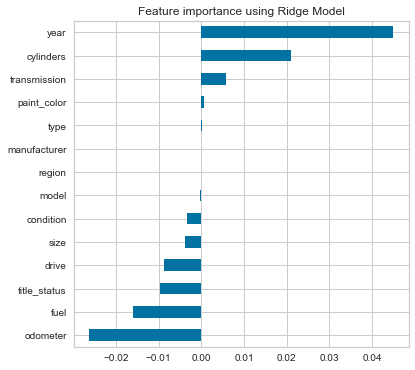

In [26]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('images/Ridge-Regression-Feature-Importance.jpg')
plt.show()

## 3.3) Lasso Regression

In [27]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [28]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.000265302301405693
Root MSLE : 0.0162881030634538
R2 Score : 0.6250925898697741 or 62.5093%


## 3.4) KNN

In [30]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

NameError: name 'KNeighborsRegressor' is not defined

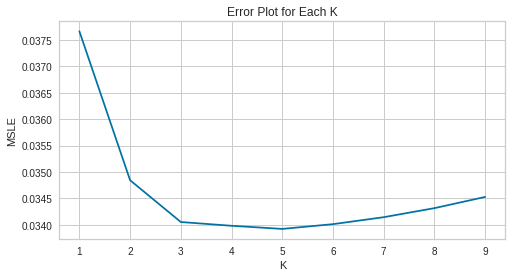

In [23]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/images/KNN-Error-Plot.jpg')
plt.show()

In [24]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [25]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0011506946528277693
Root MSLE : 0.03392189046659648
R2 Score : 0.8287711551199143 or 82.8771%


In [26]:
accu.to_csv('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/data/gold/errors.csv')

### 3.5) Random Forest

In [27]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [28]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf
accu.to_csv('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/data/gold/errors.csv')

MSLE : 0.000617721809764354
Root MSLE : 0.024854009933295552
R2 Score : 0.9107280911808399 or 91.0728%


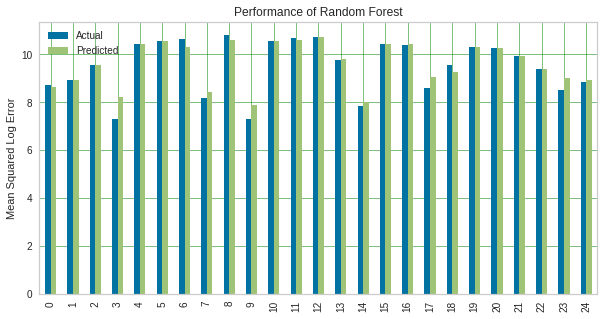

In [30]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/images/Random-Forest-Performance.jpg')
plt.show()

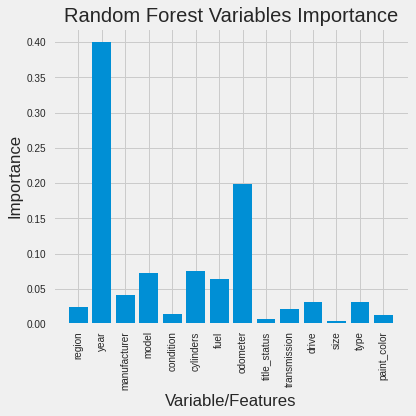

In [31]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/images/Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### 3.6) Bagging Regressor

In [32]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [33]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0011070927705153833
Root MSLE : 0.03327300362929959
R2 Score : 0.836871041976984 or 83.6871%


In [34]:
accu['Bagging Regressor']=r6_br
accu.to_csv('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/data/gold/errors.csv')

### 3.7) Adaboost

In [35]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [36]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0006347834846108004
Root MSLE : 0.025194909894873614
R2 Score : 0.907036458629177 or 90.7036%


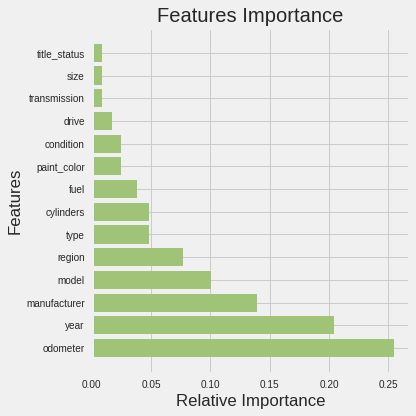

In [37]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/images/Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [38]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/data/gold/errors.csv')

### 3.8) XGBOOST

In [39]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [40]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0006422092942870922
Root MSLE : 0.02534184867540433
R2 Score : 0.9068312281673224 or 90.6831%


In [41]:
"""import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()""";

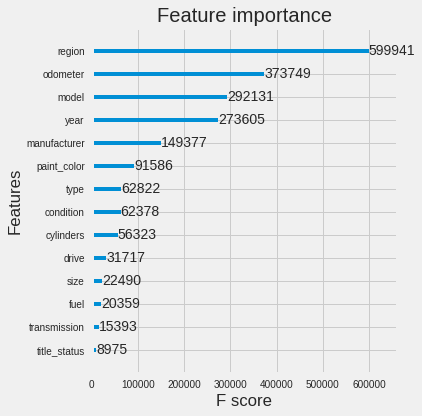

In [42]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/images/XGBoost-Features-Importance.jpg')
plt.show();

In [43]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/data/gold/errors.csv')

# Overall Result

In [48]:
accu=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/data/gold/errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.002413,0.002413,0.002413,0.001151,0.000618,0.001107,0.000635,0.000642
Root MSLE,0.049125,0.049125,0.049125,0.033922,0.024854,0.033273,0.025195,0.025342
R2 Score,0.624226,0.624226,0.624228,0.828771,0.910728,0.836871,0.907036,0.906831
Accuracy(%),62.422600,62.422600,62.422800,82.877100,91.072800,83.687100,90.703600,90.683100


In [49]:
model_accuracy=accu.loc['Accuracy(%)']

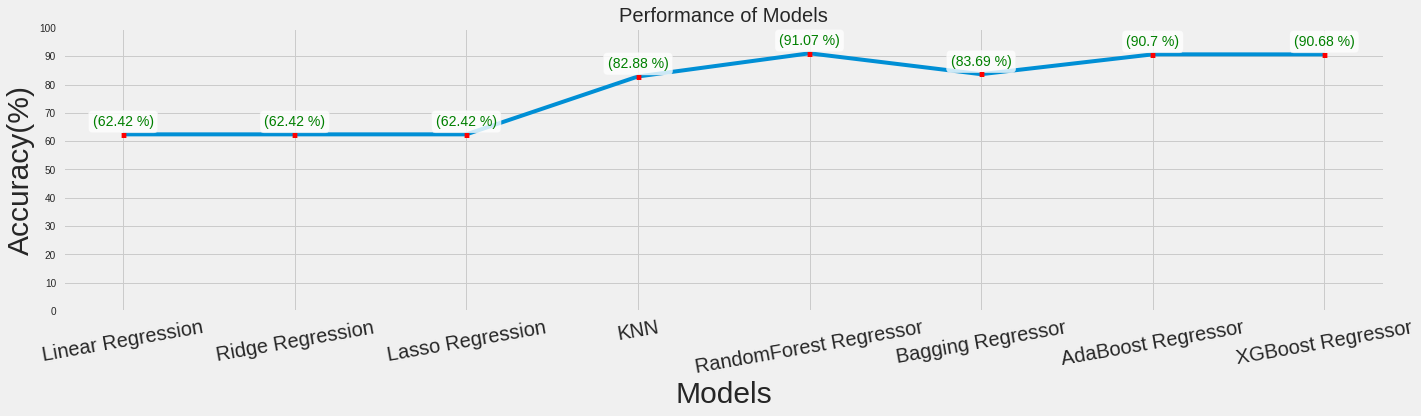

In [50]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Application_II/practical_application_II_starter/images/Overall-Performance.jpg',dpi=600)
plt.show();